In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv("D:/train.csv")
test=pd.read_csv("D:/test.csv")

In [3]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

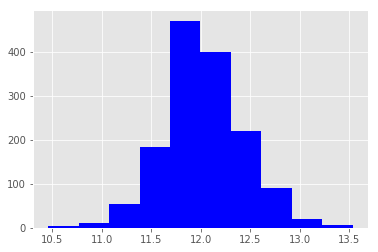

In [4]:
target = np.log(train.SalePrice)
plt.hist(target, color = 'blue')

In [5]:
train = train[train['GarageArea'] < 1200]


In [6]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first = True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first = True)


In [7]:
print(train.enc_street.value_counts())


1    1450
0       5
Name: enc_street, dtype: int64


In [8]:
print(test.enc_street.value_counts())


1    1453
0       6
Name: enc_street, dtype: int64


In [9]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

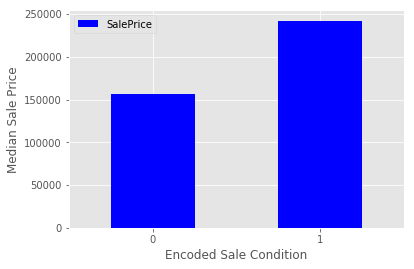

In [10]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [11]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()


In [12]:
data.isnull().sum()


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
enc_street       0
enc_condition    0
dtype: int64

In [13]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice','Id'],axis = 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=.33)

In [15]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [16]:
model = lr.fit(X_train,y_train)


In [17]:
model.score(X_train, y_train)


0.8926335399061596

In [18]:
model.score(X_test, y_test)


0.8882477709262553

In [19]:
predicts = model.predict(X_test) 


In [20]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predicts))

0.01784179451956757


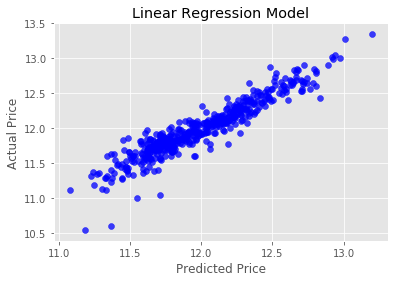

In [21]:
actual_values = y_test
plt.scatter(predicts, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

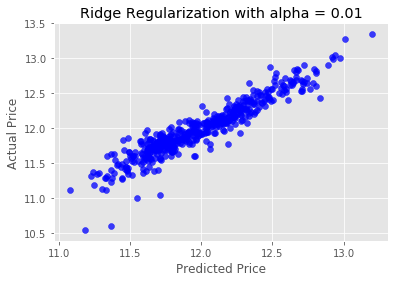

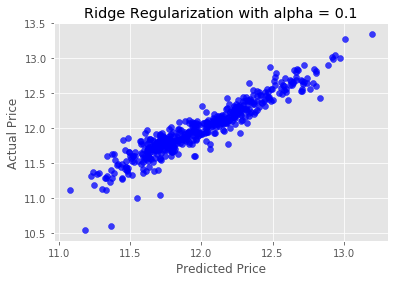

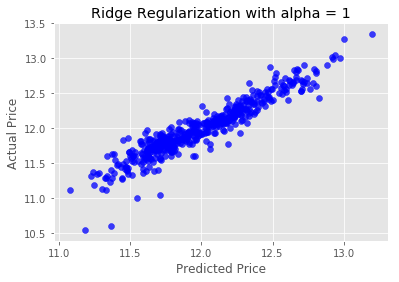

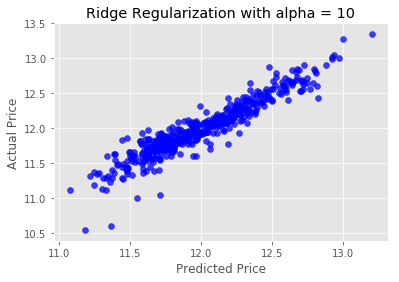

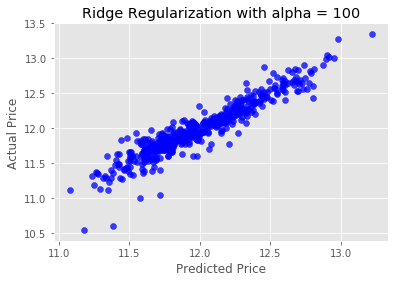

In [23]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.show()

In [24]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [25]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()


In [26]:
predictions = model.predict(feats)


In [27]:
final_predictions = np.exp(predictions)


In [28]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final predictions are: 
 [128959.49172586 122920.7402436  175704.82598102 200050.83263756
 182075.46986405]


In [29]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [31]:
submission.to_csv('D:/sub.csv', index=False)
